# Simple Linear Regression

## Importing the libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [4]:
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

## Training the Simple Linear Regression model on the Training set

In [6]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Predicting the Test set results

In [ ]:
y_pred = regressor.predict(X_test)

## Visualising the Training set results

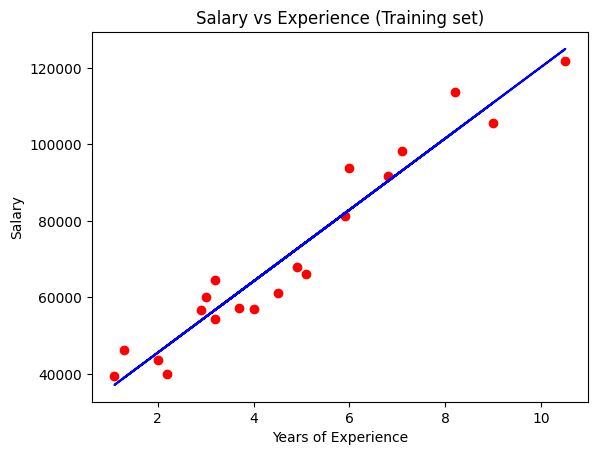

In [8]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Predicting a single value (e.g., 10.3 years of experience)

In [29]:
years_exp = 10.3
predicted_salary = regressor.predict([[years_exp]])

print(f"The predicted salary for {years_exp} years of experience is: {predicted_salary[0]}")


The predicted salary for 10.3 years of experience is: 123079.39940819162


## Visualising the Test set results

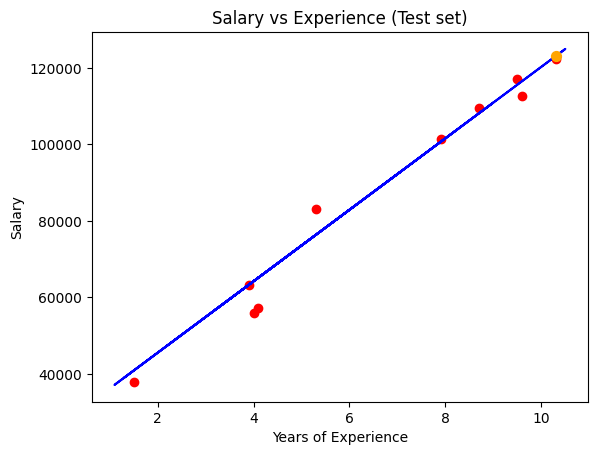

In [28]:
plt.scatter(X_test, y_test, color = 'red', label='Actual Data')
plt.plot(X_train, regressor.predict(X_train), color = 'blue', label='Regression Line')
# --- NEW: Plotting the custom point ---
plt.scatter(years_exp, predicted_salary, color='orange', s=50, zorder=5, label='My Prediction (10.3 yrs)')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Visualising the specific math "formula" the ML model created

In [17]:
print(f"Coefficient (Slope): {regressor.coef_[0]}")
print(f"Intercept: {regressor.intercept_}")

Coefficient (Slope): 9345.942443122372
Intercept: 26816.192244031183


## Measuring the Error (Residual)

In [30]:
# Create a DataFrame to compare Actual vs Predicted side-by-side
df_comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Calculate the Error (Residual)
df_comparison['Error'] = df_comparison['Actual'] - df_comparison['Predicted']

print("\n--- Detailed Comparison ---")
print(df_comparison)

# Calculate the global metrics
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Absolute Error: ${mae:.2f}")
print(f"R2 Score (Accuracy): {r2:.2f}")


--- Detailed Comparison ---
     Actual      Predicted        Error
0   37731.0   40835.105909 -3104.105909
1  122391.0  123079.399408  -688.399408
2   57081.0   65134.556261 -8053.556261
3   63218.0   63265.367772   -47.367772
4  116969.0  115602.645454  1366.354546
5  109431.0  108125.891499  1305.108501
6  112635.0  116537.239698 -3902.239698
7   55794.0   64199.962017 -8405.962017
8   83088.0   76349.687193  6738.312807
9  101302.0  100649.137545   652.862455

Mean Absolute Error: $3426.43
R2 Score (Accuracy): 0.97
